<a href="https://colab.research.google.com/github/nexustech101/colab-notebooks/blob/main/3D_graph_materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Node:
    def __init__(self, element, coordinates):
        self.element = element  # e.g., "C" for carbon
        self.coordinates = coordinates  # (x, y, z) tuple for 3D, (x, y) tuple for 2D
        self.connections = []

    def add_connection(self, other_node):
        self.connections.append(other_node)

class Graph:
    def __init__(self):
        self.nodes = []

    def add_node(self, node):
        self.nodes.append(node)

    def add_edge(self, node1, node2):
        node1.add_connection(node2)
        node2.add_connection(node1)


In [ ]:
class MaterialGraph(Graph):
    def create_1d_chain(self, elements):
        previous_node = None
        for element in elements:
            node = Node(element, (len(self.nodes), 0, 0))
            self.add_node(node)
            if previous_node:
                self.add_edge(previous_node, node)
            previous_node = node

    def create_2d_lattice(self, elements, width, height):
        for y in range(height):
            for x in range(width):
                element = elements[y * width + x]
                node = Node(element, (x, y, 0))
                self.add_node(node)
                if x > 0:
                    self.add_edge(self.nodes[-1], self.nodes[-2])
                if y > 0:
                    self.add_edge(self.nodes[-1], self.nodes[-(width + 1)])

    def create_3d_lattice(self, elements, width, height, depth):
        for z in range(depth):
            for y in range(height):
                for x in range(width):
                    element = elements[(z * height * width) + (y * width) + x]
                    node = Node(element, (x, y, z))
                    self.add_node(node)
                    if x > 0:
                        self.add_edge(self.nodes[-1], self.nodes[-2])
                    if y > 0:
                        self.add_edge(self.nodes[-1], self.nodes[-(width + 1)])
                    if z > 0:
                        self.add_edge(self.nodes[-1], self.nodes[-(width * height + 1)])


Permutation 1:


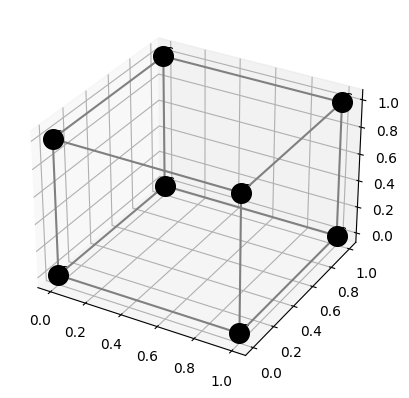

Permutation 2:


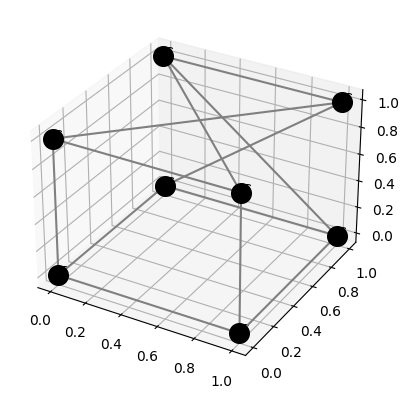

Permutation 3:


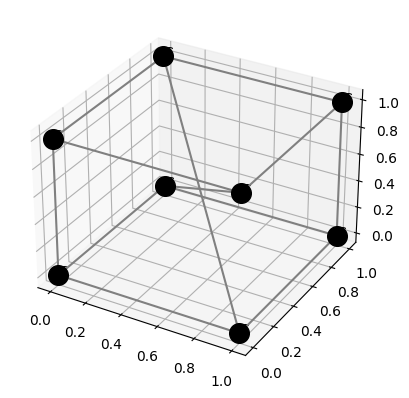

Permutation 4:


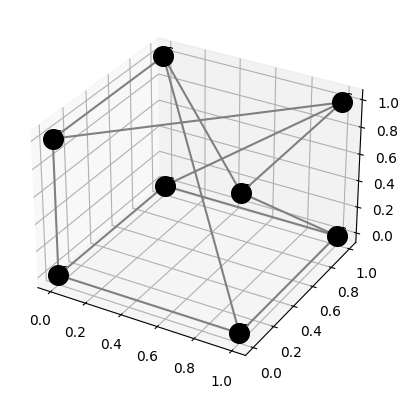

Permutation 5:


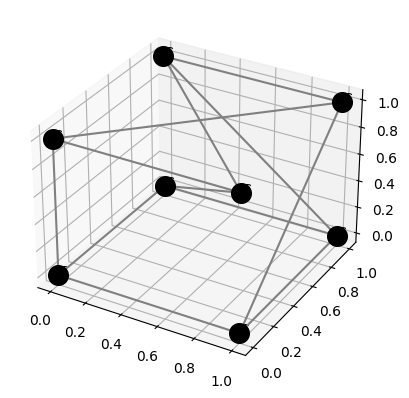

Permutation 6:


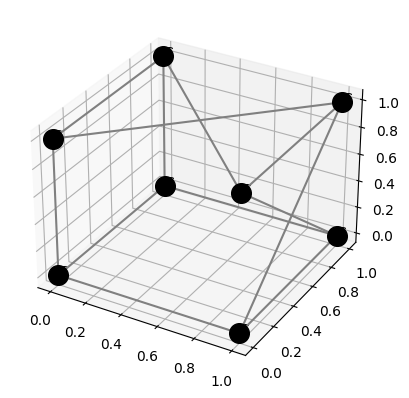

In [ ]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

class Node:
    def __init__(self, element, coordinates):
        self.element = element  # e.g., "C" for carbon
        self.coordinates = coordinates  # (x, y, z) tuple for 3D
        self.connections = []

    def add_connection(self, other_node):
        self.connections.append(other_node)

class Graph:
    def __init__(self):
        self.nodes = []

    def add_node(self, node):
        self.nodes.append(node)

    def add_edge(self, node1, node2):
        if node2 not in node1.connections:
            node1.add_connection(node2)
        if node1 not in node2.connections:
            node2.add_connection(node1)

class MaterialGraph(Graph):
    def create_3d_lattice(self, elements, width, height, depth):
        index = 0
        for z in range(depth):
            for y in range(height):
                for x in range(width):
                    if index < len(elements):
                        element = elements[index]
                        node = Node(element, (x, y, z))
                        self.add_node(node)
                        if x > 0:
                            self.add_edge(node, self.nodes[-2])
                        if y > 0:
                            self.add_edge(node, self.nodes[-(width + 1)])
                        if z > 0:
                            self.add_edge(node, self.nodes[-(width * height + 1)])
                        index += 1

def generate_permutations(material_graph):
    nodes = material_graph.nodes
    elements = [node.element for node in nodes]
    coords = [node.coordinates for node in nodes]

    # Generate all permutations of node coordinates
    coord_permutations = itertools.permutations(coords)

    for perm_coords in coord_permutations:
        perm_graph = MaterialGraph()

        # Create nodes with permuted coordinates and original elements
        node_mapping = {i: Node(elements[i], perm_coords[i]) for i in range(len(nodes))}

        # Add permuted nodes to the new graph
        for node in node_mapping.values():
            perm_graph.add_node(node)

        # Add edges based on original connections
        for i in range(len(nodes)):
            old_node = nodes[i]
            new_node = node_mapping[i]
            for connection in old_node.connections:
                connection_index = nodes.index(connection)
                perm_graph.add_edge(new_node, node_mapping[connection_index])

        yield perm_graph

def visualize_graph_3d(material_graph):
    G = nx.Graph()
    for node in material_graph.nodes:
        G.add_node(node, pos=node.coordinates)
        for connection in node.connections:
            G.add_edge(node, connection)
    pos = nx.get_node_attributes(G, 'pos')

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='black', s=200)
        ax.text(x, y, z, node.element, size=10, zorder=1, color='k')

    for edge in G.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, color='gray')

    plt.show()

# Example usage:
graph = MaterialGraph()
graph.create_3d_lattice(["C", "C", "C", "C", "C", "C", "C", "C"], 2, 2, 2)
for i, permuted_graph in enumerate(generate_permutations(graph)):
    print(f"Permutation {i + 1}:")
    visualize_graph_3d(permuted_graph)
    if i == 5:  # Limit to first 6 permutations for visualization
        break
